In [10]:
import numpy as np
from collections import Counter
from PQmodel import PQ,build_data
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [3]:
# Crear un modelo secuencial
model = Sequential()

# Agregar una capa de convolución 1D
model.add(Conv1D(filters = 256, kernel_size=16, activation='relu', input_shape=(64, 1),padding='same'))
# Agregar una capa de pooling 1D
#model.add(MaxPooling1D(pool_size=4))

# Agregar otra capa de convolución 1D y pooling
model.add(Conv1D(filters = 128, kernel_size=9, activation='relu',padding='same'))
#model.add(MaxPooling1D(pool_size=2))

# Agregar otra capa de convolución 1D y pooling
model.add(Conv1D(filters = 64, kernel_size=3, activation='relu',padding='same'))
#model.add(MaxPooling1D(pool_size=2))

# Agregar otra capa de convolución 1D y pooling
model.add(Conv1D(filters = 32, kernel_size=3, activation='relu',padding='same'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters = 16, kernel_size=3, activation='relu',padding='same'))
#model.add(MaxPooling1D(pool_size=2))

# Aplanar la salida
model.add(Flatten())

# Agregar capas totalmente conectadas
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 29, activation='softmax'))  # 29 clases, activación softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 64, 256)           4352      
                                                                 
 conv1d_1 (Conv1D)           (None, 64, 128)           295040    
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 64)            24640     
                                                                 
 conv1d_3 (Conv1D)           (None, 64, 32)            6176      
                                                                 
 conv1d_4 (Conv1D)           (None, 64, 16)            1552      
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               2

In [4]:
Prueba = PQ(Cicles=1,PeriodoDisturbio=1,InicioDisturbio=0,FS=3841)

In [14]:
datos = Prueba.PQaleatorio(1000)
datos.shape

(1000, 29, 64)

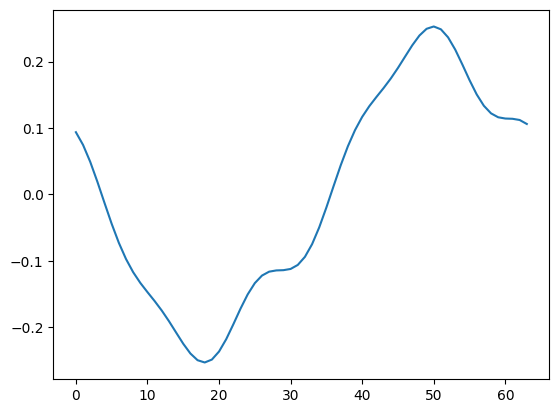

In [7]:
plt.plot(datos[0,7])
plt.show()

In [26]:
from numpy.lib.stride_tricks import sliding_window_view as ws_split

def build_data(data,cs=16):
    Muestras,tSenal,LSenal=data.shape
    db,dbl=[],[]
    for j in range(Muestras):
        for k in range (tSenal):
            s = data[j,k]
            sd= ws_split(s,window_shape=cs)
            y=np.zeros(tSenal)
            for iw in range(len(sd)):
                #print(len(sd))
                y[k]=1
                db.append(sd[iw])
                dbl.append(y)

    return np.array(db),np.array(dbl)

In [33]:
tf.config.list_physical_devices('GPU')

[]

In [15]:
datos.shape

(1000, 29, 64)

In [27]:
dd,target=build_data(datos,cs=64)

In [28]:
target.shape
dd.shape

(29000, 64)

In [31]:
Training = model.fit(dd,target,epochs=100,batch_size = 100)#,batch_size = 100

Epoch 1/100
290/290 [==============================] - 39s 136ms/step - loss: 1.0325 - accuracy: 0.5421
Epoch 2/100
290/290 [==============================] - 35s 122ms/step - loss: 0.9207 - accuracy: 0.5724
Epoch 3/100
 54/290 [====>.........................] - ETA: 32s - loss: 0.8767 - accuracy: 0.5980

KeyboardInterrupt: 

In [116]:
model.save("modelo_cnn1C.h5")

In [117]:
datosp = Prueba.PQaleatorio(1)

In [119]:
ddp,targetp=build_data(datosp,cs=64)

In [120]:
resultado=model.predict(ddp)

1/1 [==============================] - 0s 106ms/step


In [121]:
senal=20
print(list(resultado[senal]).index(np.max(resultado[senal])))

20


In [10]:
pip install tensorflow[and-cuda]

Note: you may need to restart the kernel to use updated packages.Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False